Tutorial 4: Design of Antibody Panels
=====================================

In this tutorial, we demonstrate how to design optimal antibody panels and gating strategies to isolate populations of interest using ImmunoPheno and reference data stored in the ImmunoPheno database.

We will begin by creating an instance of `ImmunoPhenoDB_Connect` (see [Tutorial 1](https://immunopheno.readthedocs.io/en/main/notebooks/Example_1.html)):

In [ ]:
# Choose the adequate plotly renderer for visualizing plotly graphs in your system
import plotly.io as pio
pio.renderers.default = 'notebook_connected'

In [6]:
from immunopheno.connect import ImmunoPhenoDB_Connect

cxn = ImmunoPhenoDB_Connect("http://www.immunopheno.org")

Loading necessary files...
Connecting to database...
Connected to database.


In this first example, we will create a three-antibody panel to isolate mucosal-associated invariant T (MAIT) cells. To begin, we will identify the cell ontology ID for MAIT cells:

In [3]:
cxn.which_celltypes("mucosal")

,idCL,label,idExperiment_used
0,CL:0000940,mucosal invariant T cell,"7,8,11,12,13,14"


We can now use `optimal_antibody_panel()` to identify an optimal set of three antibodies and an the corresponding gating strategy for isolating this population. We will also generate visualizations of the gating strategy, including the gates and the decision tree.

Retrieving antibody panel reference data...
Initial number of antibodies in reference: 646
Merging antibodies by clone ID...
Number of antibodies merged: 257
Remaining antibodies after merging: 391
Imputing missing values...
Number of antibodies imputed: 136
Number of cells imputed: 6338
Number of cell types imputed: 19
Remaining number of antibodies after imputation: 136
Remaining number of cells after imputation: 6338


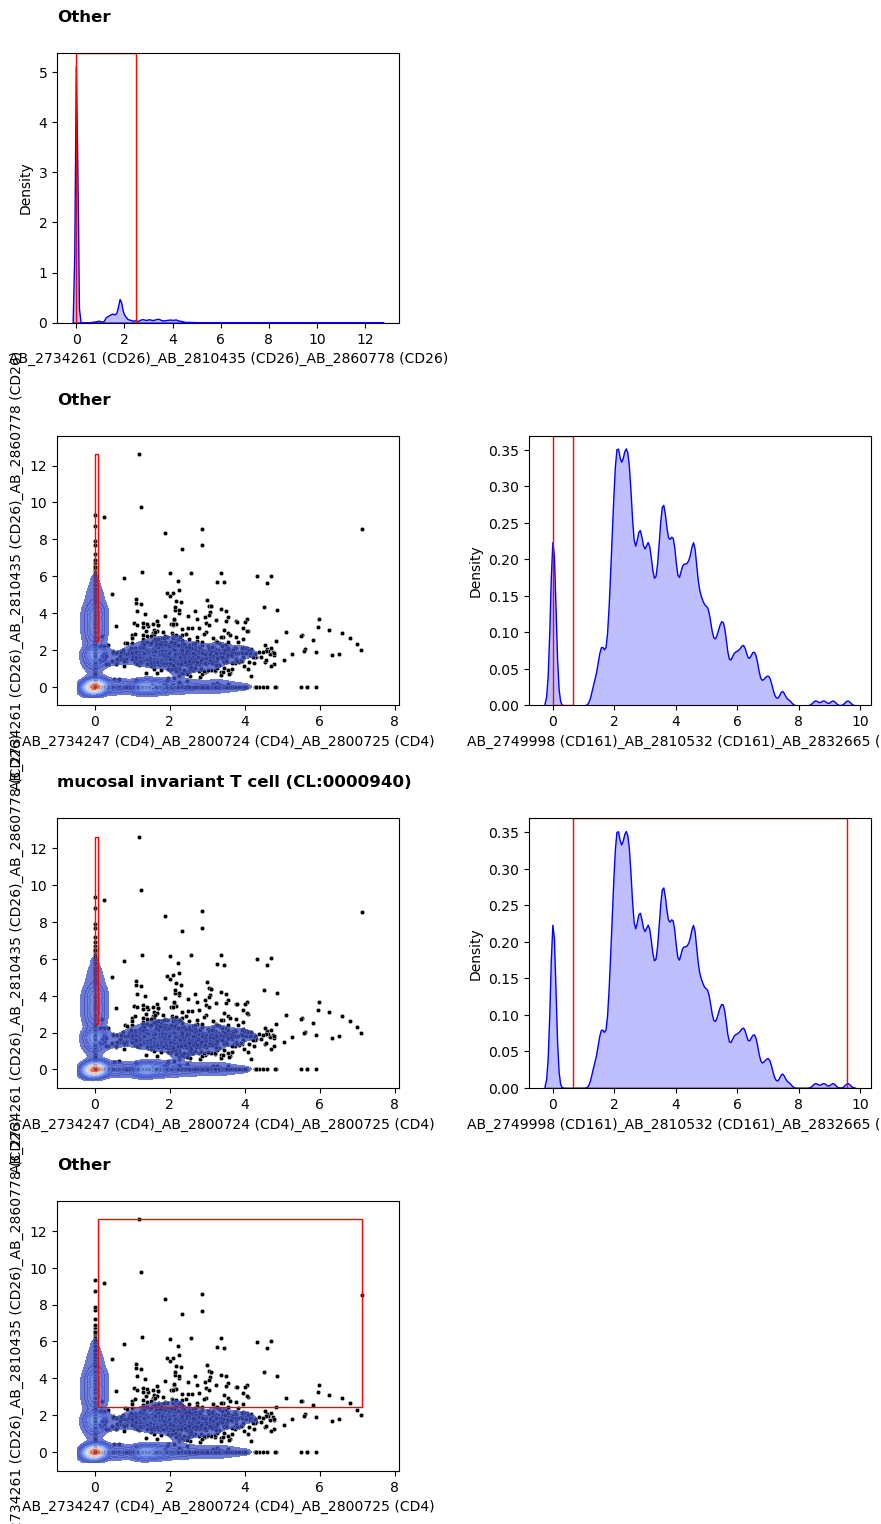

In [4]:
optimal_ab, path_yield_purity, gates = cxn.optimal_antibody_panel(target = ["CL:0000940"], panel_size = 3, plot_gates=True, plot_decision_tree=True)

An image of the decision tree is automatically saved in the file `decision_tree.png`:

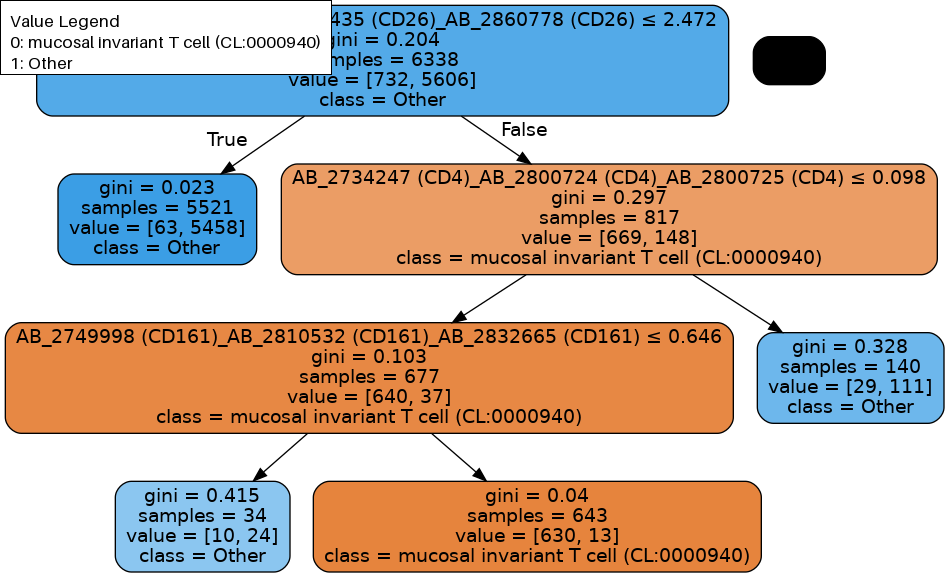

Each leaf in the tree corresponds to a gating strategy consisting of a sequence of bivalent gates. From both the tree and the gate visualization above, we observe that MAIT cells can be isolated by gating for CD26+ CD4- CD161+ cells. The expected purity (specificity) of this gate is 98%, and the expected yield (sensitivity) is 86%:

In [5]:
path_yield_purity

{'Strategy 1': {'class': 'Other',
  'purity': 0.9885890237275856,
  'yield': 0.9735997145915091,
  'path': [('AB_2734261 (CD26)_AB_2810435 (CD26)_AB_2860778 (CD26)',
    '<=',
    2.471950054168701)]},
 'Strategy 2': {'class': 'Other',
  'purity': 0.7058823529411765,
  'yield': 0.004281127363539065,
  'path': [('AB_2734261 (CD26)_AB_2810435 (CD26)_AB_2860778 (CD26)',
    '<=',
    2.471950054168701),
   ('AB_2734247 (CD4)_AB_2800724 (CD4)_AB_2800725 (CD4)',
    '<=',
    0.09808500111103058),
   ('AB_2749998 (CD161)_AB_2810532 (CD161)_AB_2832665 (CD161)',
    '<=',
    0.6455349922180176)]},
 'Strategy 3': {'class': 'mucosal invariant T cell (CL:0000940)',
  'purity': 0.9797822706065319,
  'yield': 0.860655737704918,
  'path': [('AB_2734261 (CD26)_AB_2810435 (CD26)_AB_2860778 (CD26)',
    '<=',
    2.471950054168701),
   ('AB_2734247 (CD4)_AB_2800724 (CD4)_AB_2800725 (CD4)',
    '<=',
    0.09808500111103058),
   ('AB_2749998 (CD161)_AB_2810532 (CD161)_AB_2832665 (CD161)',
    '<=',
  

We can now retrieve additional information about the selected antibodies:

In [8]:
optimal_ab

,importance
AB_2734261 (CD26)_AB_2810435 (CD26)_AB_2860778 (CD26),0.855453
AB_2734247 (CD4)_AB_2800724 (CD4)_AB_2800725 (CD4),0.116557
AB_2749998 (CD161)_AB_2810532 (CD161)_AB_2832665 (CD161),0.027991


The "importance" column quantifies how informative each antibody is. Note that for each surface marker, ImmunoPheno may return multiple antibody IDs. This is because, by default, `optimal_antibody_panel()` does not distinguish between antibodies from different vendors corresponding to the same antibody clone. This behavior can be overridden using the `merge_option` argument.

We can then search for additional information about each specific antibody:

In [7]:
cxn.which_antibodies("AB_2800724")

,idAntibody,abName,abTarget,clonality,citation,comments,cloneID,host,vendor,catalogNum,idExperiment_used
0,AB_2800724,TotalSeq(TM)-B0072 anti-human CD4,CD4,monoclonal,"(BioLegend Cat# 300565, RRID:AB_2800724)",Applications: PG,RPA-T4,mouse,BioLegend,300565,"4,5,6"


ImmunoPheno also allow us to specify one or more background populations and tissue contexts when designing antibody panels. For example, let us find a three-antibody panel for isolating transitional B cells from other B cells in the bone marrow.

We can identidy the tissue ontology ID by searching for relevant experiments in the ImmunoPheno database:

In [9]:
cxn.which_experiments("bone marrow")

,idExperiment,nameExp,typeExp,pmid,doi,idBTO,tissue
0,10,An immunophenotype-coupled transcriptomic atla...,CITE,38514887,https://doi.org/10.1038/s41590-024-01782-4,BTO:0004122,bone marrow stromal cell
1,12,Comprehensive Integration of Single-Cell Data,CITE,31178118,https://doi.org/10.1016/j.cell.2019.05.031,BTO:0000141,bone marrow
2,14,Multimodal hierarchical classification of CITE...,CITE,37461466,https://doi.org/10.1016/j.crmeth.2024.100938,BTO:0000141,bone marrow
3,18,Single-cell proteo-genomic reference maps of t...,AB,34811546,https://doi.org/10.1038/s41590-021-01059-0,BTO:0000141,bone marrow


Additionally, we can identify the cell ontology ID for transitional B cells by searching for cell types in the ImmunoPheno database:

In [10]:
cxn.which_celltypes("B cell")

,idCL,label,idExperiment_used
0,CL:0000236,B cell,10
1,CL:0000787,memory B cell,"1,2,3,4,5,6,7,8,11,12,13,14,15,16"
2,CL:0000788,naive B cell,"1,2,3,4,5,6,7,8,11,12,15,16,17,18"
3,CL:0000816,immature B cell,"5,17,18"
4,CL:0000817,precursor B cell,"10,12,18"
5,CL:0000818,transitional stage B cell,"10,12"
6,CL:0000826,pro-B cell,12
7,CL:0000955,pre-B-II cell,5
8,CL:0000970,unswitched memory B cell,"17,18"
9,CL:0000972,class switched memory B cell,"17,18"


With this information, we can now call `optimal_antibody_panel()` to identify the three-antibody panel:

Retrieving antibody panel reference data...
Initial number of antibodies in reference: 339
Merging antibodies by clone ID...
Number of antibodies merged: 42
Remaining antibodies after merging: 299
Imputing missing values...
Number of antibodies imputed: 35
Number of cells imputed: 2653
Number of cell types imputed: 4
Remaining number of antibodies after imputation: 38
Remaining number of cells after imputation: 2653


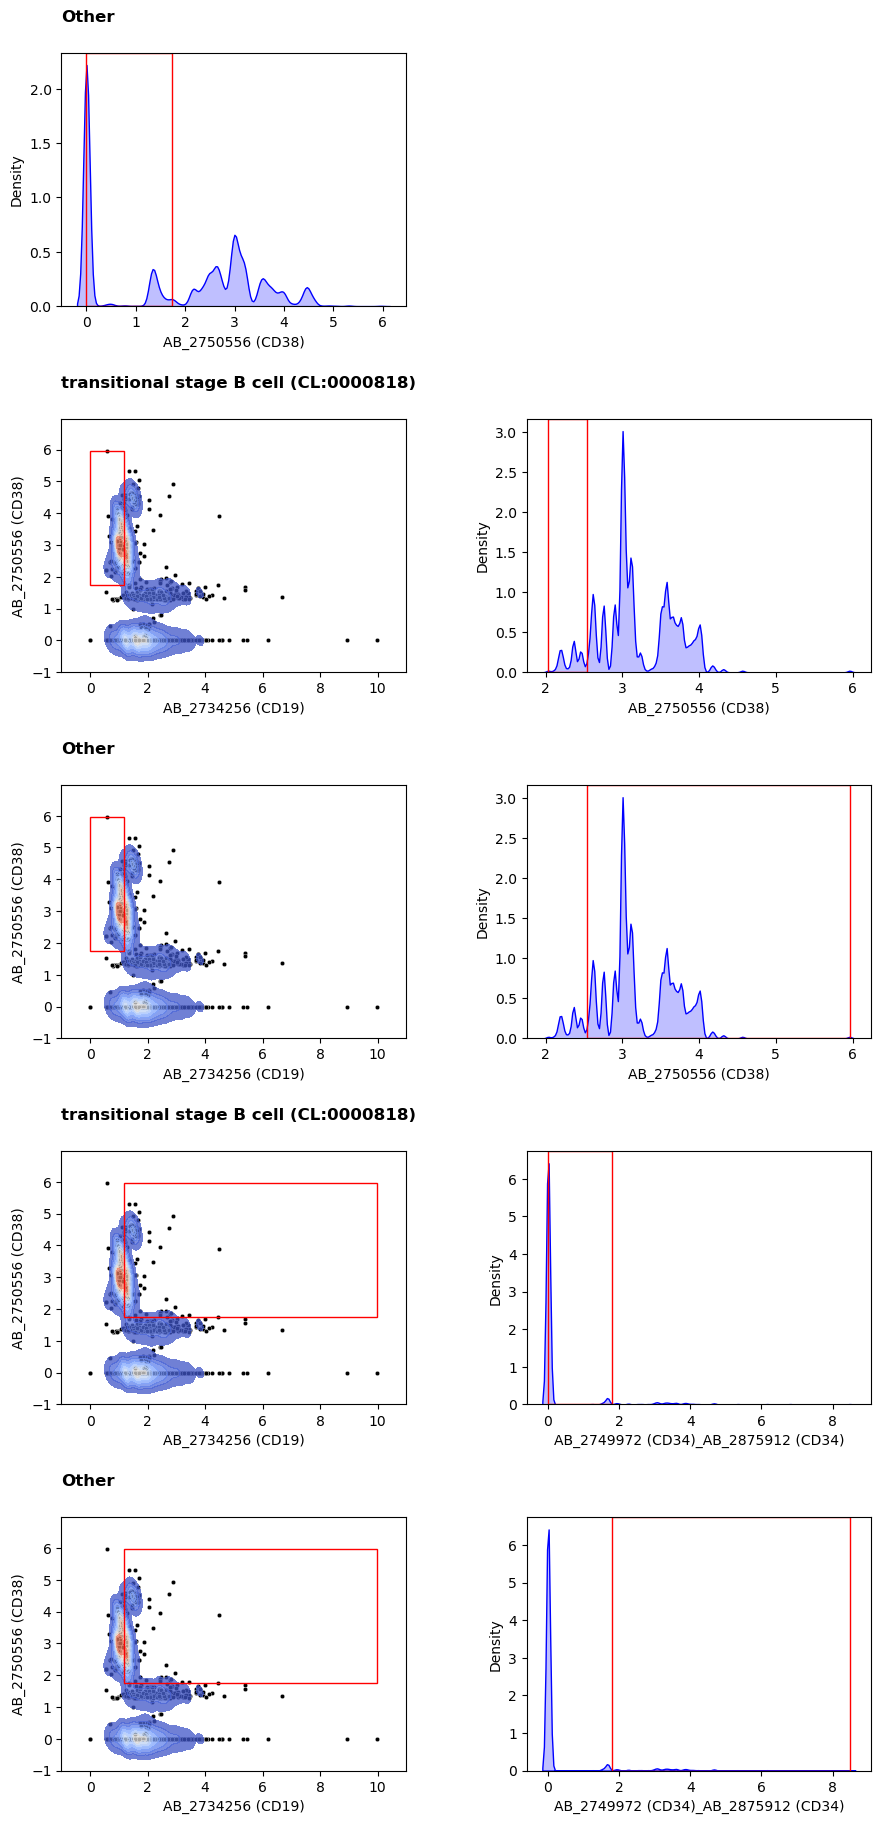

In [11]:
optimal_ab, path_yield_purity, gates = cxn.optimal_antibody_panel(target = ["CL:0000818"], background=["CL:0000236"], tissue = ["BTO:0000141", "BTO:0004122"], panel_size = 3, plot_gates=True)

In [12]:
optimal_ab

,importance
AB_2734256 (CD19),0.566521
AB_2750556 (CD38),0.346535
AB_2749972 (CD34)_AB_2875912 (CD34),0.086945


In [13]:
path_yield_purity

{'Strategy 1': {'class': 'Other',
  'purity': 0.9991589571068125,
  'yield': 0.5984886649874055,
  'path': [('AB_2750556 (CD38)', '<=', 1.7413790225982666)]},
 'Strategy 2': {'class': 'transitional stage B cell (CL:0000818)',
  'purity': 0.7068965517241379,
  'yield': 0.061377245508982034,
  'path': [('AB_2750556 (CD38)', '<=', 1.7413790225982666),
   ('AB_2734256 (CD19)', '<=', 1.1793869137763977),
   ('AB_2750556 (CD38)', '<=', 2.5338900089263916)]},
 'Strategy 3': {'class': 'Other',
  'purity': 0.9863760217983651,
  'yield': 0.36473551637279594,
  'path': [('AB_2750556 (CD38)', '<=', 1.7413790225982666),
   ('AB_2734256 (CD19)', '<=', 1.1793869137763977),
   ('AB_2750556 (CD38)', '<=', 2.5338900089263916)]},
 'Strategy 4': {'class': 'transitional stage B cell (CL:0000818)',
  'purity': 0.9824561403508771,
  'yield': 0.9221556886227545,
  'path': [('AB_2750556 (CD38)', '<=', 1.7413790225982666),
   ('AB_2734256 (CD19)', '<=', 1.1793869137763977),
   ('AB_2749972 (CD34)_AB_2875912 (CD

The expected purity and yield of the proposed gating strategy are 98% and 92%, respectively.